# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [37]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
plt.rcParams['figure.figsize'] = 12, 12
%matplotlib inline

matplotlib.style.use('ggplot')
## Load the data into a DataFrame
df = pd.read_csv("../assets/Iowa_Liquor_sales_sample_10pct.csv")

## Although not desirable at this point - dropping the null values
df.dropna(inplace=True)
# Printing Data Frame
df
#Backup Data Frame
df1 = df

In [38]:
#Data types display
df.dtypes

Date                      object
Store Number               int64
City                      object
Zip Code                  object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number              int64
Item Number                int64
Item Description          object
Bottle Volume (ml)         int64
State Bottle Cost         object
State Bottle Retail       object
Bottles Sold               int64
Sale (Dollars)            object
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

# Problem Statement
There is a lot of data to analyze the liquor sales of Iowa. There is significant amount of missing data particularly relatd to County Number and County Name, Category and Category Name. We need to move this kind of data into separate generic data bin so that we don't loose signinficant sale dollars for the analysis.
Also the data is missing some additional information/columns like Age, Gender etc. This additinal information will be useful to draw some patterns during data analysis. That gives us flexibility to understand the sales among certain age groups and genders.
Since the data is given on date basis, data cleansing and regrouping of the data is required.

In [39]:
# do your parsing here
# Determining the Quarters of the year
def binMonthsToQuarters(month):
    if( month > 9):
        return 4
    elif month > 6:
        return 3
    elif month > 3:
        return 2
    return 1

#Reframing and reformatting the dataframe with certain columns
columns = ['Store Number','Sale (Dollars)','Date']
df = df[columns]
df['Date'] = pd.to_datetime(df.Date, format="%m/%d/%Y")
df['Month'] = df.Date.apply( lambda date: date.month )
df['Quarter'] = df.Month.apply(binMonthsToQuarters)
df['Year'] = df.Date.apply( lambda date: date.year )
df['Sale (Dollars)'] = df['Sale (Dollars)'].apply( lambda dollars: dollars.replace("$","") ).astype(float)

C:\Users\PASAGI\Anaconda2\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\PASAGI\Anaconda2\lib\site-packages\ipykernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\PASAGI\Anaconda2\lib\site-packages\ipykernel\__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

In [40]:
# Identifying data types
df.dtypes

Store Number               int64
Sale (Dollars)           float64
Date              datetime64[ns]
Month                      int64
Quarter                    int64
Year                       int64
dtype: object

In [41]:
## Taking first quarter
dfQ1 = df[ df.Quarter == 1 ]

## function for sum
def getTotalSales(group): return sum( group['Sale (Dollars)'] )

## Group By Quarterly and Yearly
dfGrpByStoreandQ = dfQ1.groupby(['Store Number','Year','Quarter'])
dfGrpByStoreandY = df.groupby(['Store Number','Year'])

## Do aggregation and add Key
aggregations1 = { 'Sale (Dollars)' : 'sum' }


yearlyStoreSales   = dfGrpByStoreandY.agg(aggregations1).reset_index()


quarterlyStoreSales = dfGrpByStoreandQ.agg(aggregations1).reset_index()

yearlyStoreSales = yearlyStoreSales.rename(columns = {'Sale (Dollars)' : 'Yearly Sales'})

print yearlyStoreSales.head()

quarterlyStoreSales = quarterlyStoreSales.rename(columns = {'Sale (Dollars)' : 'Q1 Sales'})

print quarterlyStoreSales.head()

# Join two data frames together
result = pd.merge(yearlyStoreSales,quarterlyStoreSales, how='inner', on=['Store Number', 'Year'])

# Data frame filtered for year 2015 data
resultForRegression = result[ result.Year == 2015 ]

#Print the data frame data
print result.head()
print resultForRegression.head()


   Store Number  Year  Yearly Sales
0          2106  2015     146038.70
1          2106  2016      30478.75
2          2113  2015       9310.22
3          2113  2016       2065.90
4          2130  2015     111583.91
   Store Number  Year  Quarter  Q1 Sales
0          2106  2015        1  39287.29
1          2106  2016        1  30478.75
2          2113  2015        1   2833.25
3          2113  2016        1   2065.90
4          2130  2015        1  24272.57
   Store Number  Year  Yearly Sales  Quarter  Q1 Sales
0          2106  2015     146038.70        1  39287.29
1          2106  2016      30478.75        1  30478.75
2          2113  2015       9310.22        1   2833.25
3          2113  2016       2065.90        1   2065.90
4          2130  2015     111583.91        1  24272.57
   Store Number  Year  Yearly Sales  Quarter  Q1 Sales
0          2106  2015     146038.70        1  39287.29
2          2113  2015       9310.22        1   2833.25
4          2130  2015     111583.91        

In [42]:
result.head()

,Store Number,Year,Yearly Sales,Quarter,Q1 Sales
0,2106,2015,146038.70,1,39287.29
1,2106,2016,30478.75,1,30478.75
2,2113,2015,9310.22,1,2833.25
3,2113,2016,2065.90,1,2065.90
4,2130,2015,111583.91,1,24272.57


In [43]:
resultForRegression.head()

,Store Number,Year,Yearly Sales,Quarter,Q1 Sales
0,2106,2015,146038.70,1,39287.29
2,2113,2015,9310.22,1,2833.25
4,2130,2015,111583.91,1,24272.57
6,2152,2015,7721.08,1,2003.46
8,2178,2015,24324.18,1,5856.41


In [44]:
#Data frame for analysis
dbFinal = resultForRegression
dbFinal.describe()

,Store Number,Year,Yearly Sales,Quarter,Q1 Sales
count,1261.000000,1261.0,1261.000000,1261.0,1261.000000
mean,4165.405234,2015.0,22059.092807,1.0,4875.750206
std,810.479948,0.0,52611.922488,0.0,11563.846736
min,2106.000000,2015.0,44.140000,1.0,11.210000
25%,3803.000000,2015.0,3587.910000,1.0,833.370000
50%,4376.000000,2015.0,7771.780000,1.0,1861.750000
75%,4744.000000,2015.0,20389.680000,1.0,4594.290000
max,9010.000000,2015.0,997924.420000,1.0,206799.860000


# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

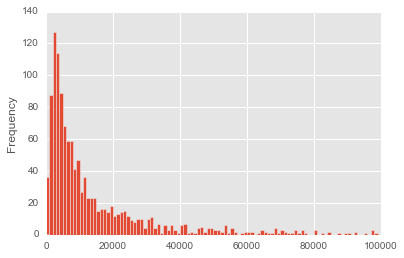

In [45]:
# Histogram Display for Yearly Sales
dbFinal['Yearly Sales'].plot(kind="hist", bins=100, range=(0,100000))

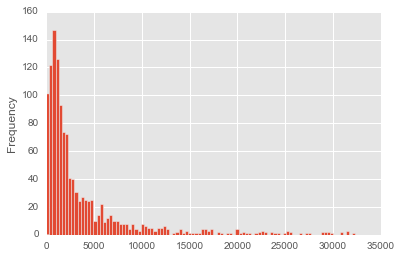

In [46]:
#Histogram display for Quarterly Sales
dbFinal['Q1 Sales'].plot(kind="hist", bins = 100, range=(0,33000))

## Record your findings

Be sure to write out anything observations from your exploratory analysis.

The Iowa Liquor Sales data has been reframed to have Stores, 1st quarter sales and overa all year sales for the year 2015. This reframed data gives us a view if the store sales are having consitent or varying sales from 1st quarter to overall year.

As a sample, two histograms have been plotted - one for yearly sales and second for quarterly sales. Both the charts show that many stores fall into low sale category. The histograms are consistent.

If we look at the Yearly Sales chart, it can be observed that many stores fall into below \$20,000 dollar sales category.
If we take average by quarter, there are many stores fall into below\$5000 sales category. This is very close to the second histogram for 1st quarter sales. 
Majority of the stores' sales is close to the mean \$4875.75 for Q1 sales and \$22059.09 for Yearly sales.

# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.
Pandas is your friend for this task. Take a look at the operations here for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

In [47]:
dbFinal.corr()


,Store Number,Year,Yearly Sales,Quarter,Q1 Sales
Store Number,1.000000,NaN,-0.348360,NaN,-0.343348
Year,NaN,NaN,NaN,NaN,NaN
Yearly Sales,-0.348360,NaN,1.000000,NaN,0.981436
Quarter,NaN,NaN,NaN,NaN,NaN
Q1 Sales,-0.343348,NaN,0.981436,NaN,1.000000


In [48]:
#dbFinal['Yearly Sales'] = [x/4 for x in dbFinal['Yearly Sales']]
dbFinal.columns = [x.replace(' ','_') for x in dbFinal.columns]
dbFinal.head()

,Store_Number,Year,Yearly_Sales,Quarter,Q1_Sales
0,2106,2015,146038.70,1,39287.29
2,2113,2015,9310.22,1,2833.25
4,2130,2015,111583.91,1,24272.57
6,2152,2015,7721.08,1,2003.46
8,2178,2015,24324.18,1,5856.41


# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [49]:
import statsmodels.formula.api as smf
lmod = smf.ols(formula='Yearly_Sales ~ Q1_Sales', data=dbFinal).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Yearly_Sales   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                 3.297e+04
Date:                Mon, 27 Jun 2016   Prob (F-statistic):               0.00
Time:                        10:51:14   Log-Likelihood:                -13414.
No. Observations:                1261   AIC:                         2.683e+04
Df Residuals:                    1259   BIC:                         2.684e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    287.7403    308.517      0.933      0.351      -317.524   893.004
Q1_Sales       4.4652      0.025    181.574      0.000         4.417     4.513
==============================================================================
Omnibus:                      607.595   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36721.066
Skew:                           1.414   Prob(JB):                         0.00
Kurtosis:                      29.285   Cond. No.                     1.36e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can see that the R value is very close to 1 and the p value the null hypothesis is that the model is true.

In [50]:
lmod.params

Intercept    287.740268
Q1_Sales       4.465231
dtype: float64

In [51]:
#from sklearn import linear_model
predictions = lmod.predict(dbFinal[['Q1_Sales','Store_Number']])
#print predictions
print predictions

[ 175714.57813302   12938.85691144  108670.3800979  ...,   10741.20401169
   22011.80508693   17530.67754142]


## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

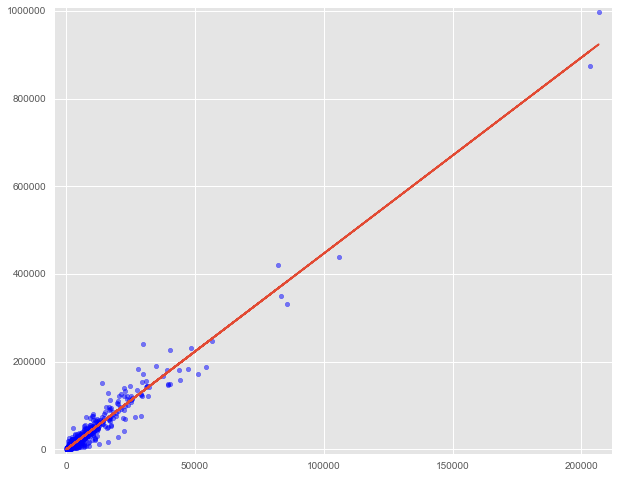

In [52]:
plt.figure(figsize=(10,8))
plt.scatter(dbFinal.Q1_Sales, dbFinal.Yearly_Sales, color='b', alpha=0.5)

# set the figure boundaries
plt.xlim([min(dbFinal['Q1_Sales'])-5000, max(dbFinal['Q1_Sales'])+5000])
plt.ylim([min(dbFinal['Yearly_Sales'])-10000, max(dbFinal['Yearly_Sales'])+10000])

plt.plot(dbFinal.Q1_Sales,predictions)
plt.show()

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.

The above plot represents how best the model fits for the annual sales predictions basing on the 1st Quarter Sales.
The plot shows the correlation is evenly close to the predictor line. 
Many stores fall into the \$5000 sales category in 1st Quarter and \$20,000 sales categroy in annual sales. 
The predictions for the annual sales basing on 1st quarter sales with linear regression model is consistent with the actuals.
Therefore the current model fits.